In [9]:
#import packages
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as sps
import scipy.special as spsp
import scipy.optimize as spop
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
the best fitting distribution has shape parameter 0.8517


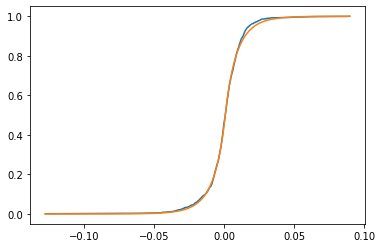

p-value of the Kolmogorov-Smirnov test: 38.1358%
the distribution fits the data


In [19]:
#generalised error (generalised normal) distribution
#probability density function: f(x) = shape/(2*scale*gamma(1/shape))*e^(-(abs((x-loc)/scale))^shape)
#cumulative distribution function: F(x) = 1/2 + sign(x - loc)/2*gammainc(1/shape, (abs(x-loc)/scale)^shape)
#if shape = 1: Laplace distribution, if shape = 2: normal distribution
#specify the sample
ticker = '^GSPC'
start = '2017-11-30'
end = '2022-11-30'
#retrieve data
prices = np.array(yf.download(ticker, start, end)['Close'])
#calculate and sort returns
returns = np.log(prices[1:]/prices[:-1])
returns = np.sort(returns)
#construct empirical distribution function
edf = np.arange(1, len(returns)+1)/len(returns)
#calculate mean and standard deviation
mean = np.average(returns)
std = np.std(returns)
#optimise generalised error distribution parameters using maximum likelihood estimation
def ged_optimisation(k):
    k[1] = abs(k[1])
    k[2] = abs(k[2])
    pdf = k[2]/(2*k[1]*spsp.gamma(1/k[2]))*np.exp(-(abs(returns-k[0])/k[1])**k[2])
    return -np.sum(np.log(pdf))
res = spop.minimize(ged_optimisation, [mean, std, 2], method='Nelder-Mead')
#retrieve optimal distribution parameters
ged_loc = res.x[0]
ged_scale = abs(res.x[1])
ged_shape = abs(res.x[2])
print('the best fitting distribution has shape parameter '+str(round(ged_shape, 4)))
#calculate the cumulative distribution function
cdf = 1/2 + np.sign(returns - ged_loc)/2*spsp.gammainc(1/ged_shape, (abs(returns-ged_loc)/ged_scale)**ged_shape)
#visualise the distribution functions
plt.plot(returns, edf)
plt.plot(returns, cdf)
plt.show()
#evaluate the goodness-of-fit using Kolmogorov-Smirnov test
supremum = max(abs(edf - cdf))
p_value = np.exp(-supremum**2*len(returns))
print('p-value of the Kolmogorov-Smirnov test: '+str(round(p_value*100,4))+'%')
if p_value < 0.1:
    print('the distribution does not fit the data')
else:
    print('the distribution fits the data')